# Author Identification of Victorian Texts

From the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution); downloaded on May 9, 2020.

Authorship attribution is the process of identifying the author of a given text and from the machine learning perspective, it can be seen as a classification problem. 

To create the largest publicly available authorship attribution dataset we've extracted the works of 50 well-known Victorian-era authors. All of these extracted works are novels. In order to create non-exhaustive learning problem, we've provided 45 authors in training and 50 authors in the testing data. 5 missing authors in testing consist of %34 of all testing set. Each instance then represented with a 1000 word pieces for each author. 

There are 93600 text piece instance in total each which consist of 1000 words. To make the problem a bit more challenging, we've separated different books for both training and testing.  We have performed 5 main feature extraction technique on this data and compared the performance of such features within different classifiers and deep learning structures. 

The usage of Word2Vec in authorship attribution problem is also introduced with two main approaches: author based Word2Vec training and treating each author's text pieces individually. **Support vector machine classifiers with nu-SVC type is observed to give best success rates on the stacked useful feature set.**

In [2]:
%matplotlib notebook

import csv
import codecs
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import NuSVC
from yellowbrick.text import TSNEVisualizer
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.text import FreqDistVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Data Loading

Data is in 2 csv files - a `training.csv` and `test.csv` datasets where the first column is the authorship text and the second column is the author ID. This is a 50-class classification problem.

In [4]:
def load_text(path="dataset/training.csv"):
    """
    Returns a list of text and a list of authors, e.g. docs (X) and labels (y)
    """
    with codecs.open(path, 'r', 'ISO-8859-1') as f:
        reader = csv.DictReader(f)
        for row in reader:
            yield row['text'], int(row['author'])


docs, authors = zip(*list(load_text()))

- **TODO**: Visualize a bar chart of number of authors using class balance. 
- **TODO**: Print the shape of docs and authors

## Text Visualization with Yellowbrick

In [5]:
vec = CountVectorizer(stop_words='english').fit(docs)
terms = vec.transform(docs)

<IPython.core.display.Javascript object>


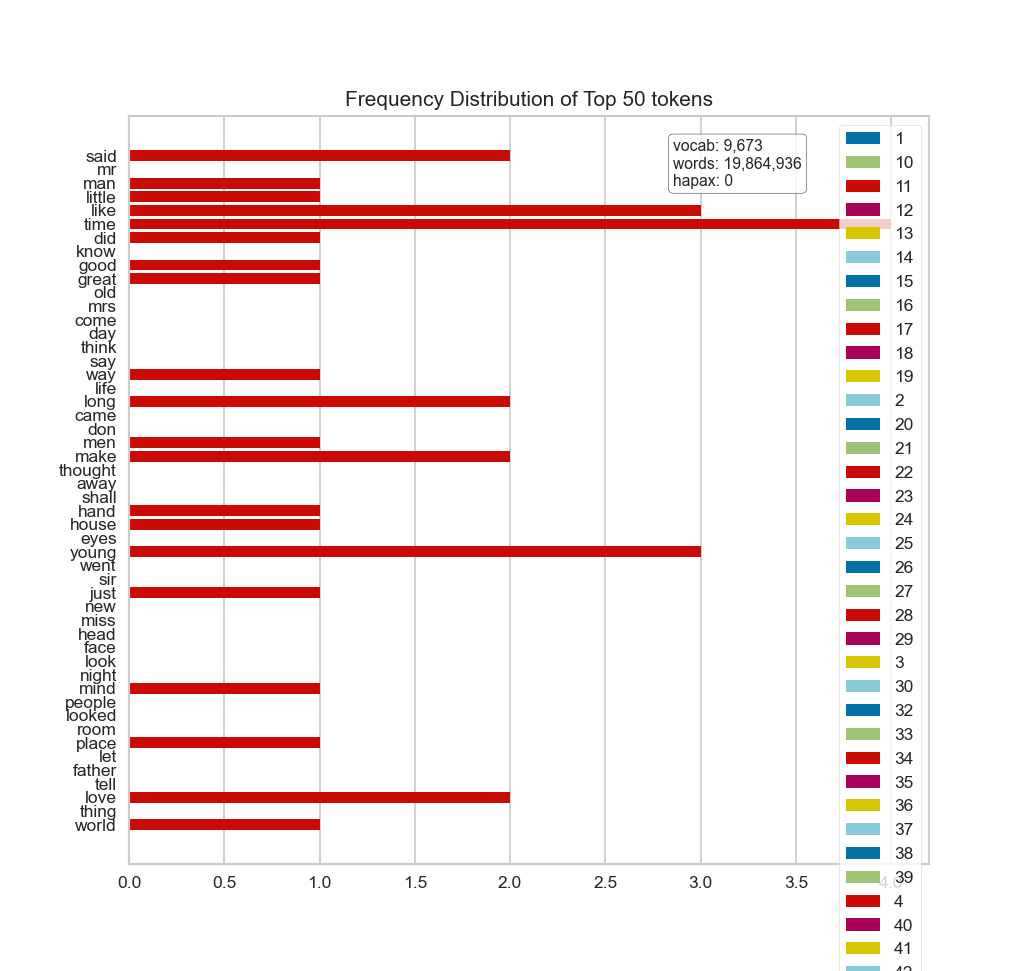

In [6]:
oz = FreqDistVisualizer(features=vec.get_feature_names()).fit(terms, authors)
oz.show()

<IPython.core.display.Javascript object>


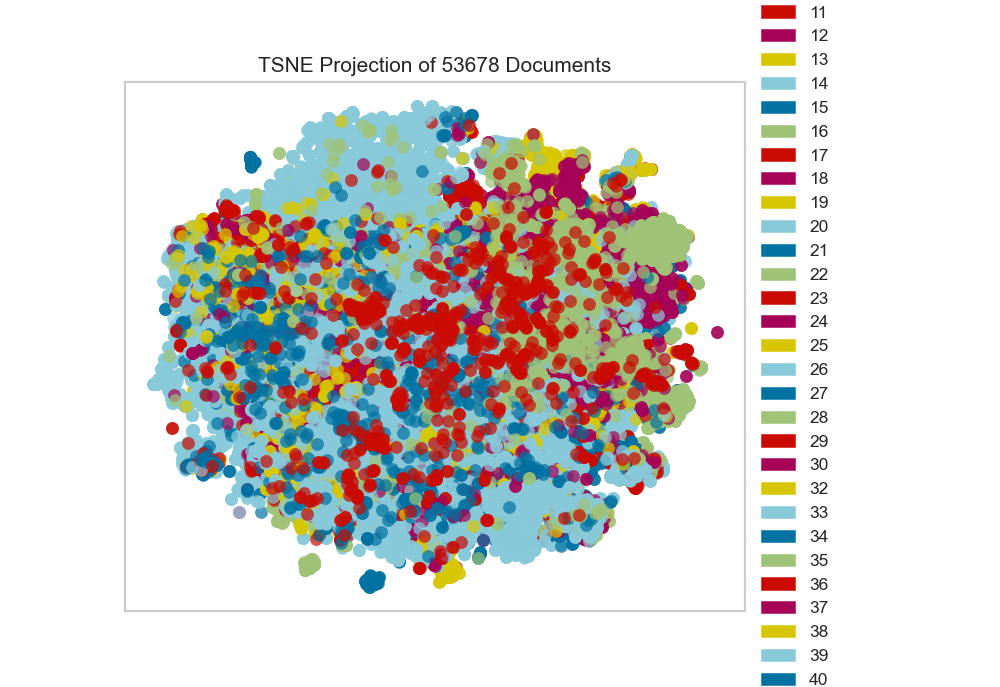

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [7]:
tsne = TSNEVisualizer()
tsne.fit(terms, authors)
tsne.show()